In [1]:
#!/usr/bin/python
from turtle import color
import pandas as pd
import numpy as np
import sys
import logging
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.stats import pearsonr
import itertools
import os
import scipy.io

/var/folders/3n/xjq3mj2x4fg20l17q5mydc1c0000gn/T/ipykernel_62776/1350883206.py:9: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


In [2]:
import numpy as np
from scipy.signal import welch

def calculate_dominant_frequency(data, fs):
    """
    Calculate the dominant frequency of a signal using the power spectral density.

    Parameters:
    data (array): The signal data.
    fs (float): The sampling frequency of the signal.

    Returns:
    float: The dominant frequency.
    """
    # Calculate the power spectral density
    freqs, psd = welch(data, fs)

    # Find the frequency with the highest power spectral density
    dominant_frequency = freqs[np.argmax(psd)]

    return dominant_frequency

In [3]:
"""
@Author: Yile Wang

This script is used to calculate the homotopic meta-connectivity in four groups, SNC, NC, MCI, AD
"""

# brain region labels for your reference
regions = ['aCNG-L', 'aCNG-R','mCNG-L','mCNG-R','pCNG-L','pCNG-R', 'HIP-L','HIP-R','PHG-L','PHG-R','AMY-L','AMY-R', 'sTEMp-L','sTEMP-R','mTEMp-L','mTEMp-R']
regionswithgroups = ['groups','aCNG-L', 'aCNG-R','mCNG-L','mCNG-R','pCNG-L','pCNG-R', 'HIP-L','HIP-R','PHG-L','PHG-R','AMY-L','AMY-R', 'sTEMp-L','sTEMP-R','mTEMp-L','mTEMp-R']
regions_id_withgroups = ['groups','caseid','aCNG-L', 'aCNG-R','mCNG-L','mCNG-R','pCNG-L','pCNG-R', 'HIP-L','HIP-R','PHG-L','PHG-R','AMY-L','AMY-R', 'sTEMp-L','sTEMP-R','mTEMp-L','mTEMp-R']
group = ['SNC', 'NC', 'MCI','AD']
regionsHalf = np.array(['aCNG', 'mCNG','pCNG','HIP','PHG','AMY','sTEMp', 'mTEMp'])

regions14 = []
for i in range(14):
    wt = ["regions_", str(i)]
    wt = "".join(wt)
    regions14.append(wt)

# iterate simulated functional connectivity
if __name__ == "__main__":
    table = pd.DataFrame(columns=regions_id_withgroups)
    for grp in group:
        ldir = os.listdir("/Users/yilewang/workspaces/data4project/lateralization/ts_fmri/fmri_AAL_16/"+ grp+'-TS')
        for ind, y in enumerate(ldir):
            # Here is the path of the mat file of the FC data
            pth_efc = "/Users/yilewang/workspaces/data4project/lateralization/ts_fmri/fmri_AAL_16/"+ grp+'-TS/'+ y +"/ROISignals_"+ y +".mat"
            # pth_efc = "/home/wayne/TS-4-Vik/"+grp+"-TS/"+ y +"/ROISignals_"+ y +".mat"
            ea = scipy.io.loadmat(pth_efc)
            all = ea['ROISignals']
            df = pd.DataFrame.from_dict(all)
            df.columns = regions
            do_freq = []
            for i in df.columns:
                do_freq.append(calculate_dominant_frequency(df[i], 0.5))
            table = pd.concat([table, pd.DataFrame([[grp, y] + do_freq], columns=regions_id_withgroups)], ignore_index=True)
    print(table)


   groups caseid    aCNG-L    aCNG-R    mCNG-L    mCNG-R    pCNG-L    pCNG-R  \
0     SNC  3610A  0.016827  0.016827  0.016827  0.016827  0.016827  0.016827   
1     SNC  2820A  0.045673  0.019231  0.019231  0.021635  0.016827  0.024038   
2     SNC  8709A  0.014423  0.014423  0.074519  0.024038  0.033654  0.084135   
3     SNC  3168A  0.093750  0.093750  0.055288  0.024038  0.043269  0.043269   
4     SNC  4481A  0.064904  0.057692  0.036058  0.031250  0.060096  0.031250   
..    ...    ...       ...       ...       ...       ...       ...       ...   
69     AD  0506A  0.069712  0.069712  0.069712  0.069712  0.019231  0.036058   
70     AD  7673A  0.067308  0.067308  0.031250  0.031250  0.031250  0.055288   
71     AD  5368A  0.031250  0.021635  0.048077  0.012019  0.012019  0.012019   
72     AD  4612A  0.024038  0.014423  0.060096  0.057692  0.014423  0.057692   
73     AD  1243A  0.016827  0.019231  0.069712  0.069712  0.012019  0.021635   

       HIP-L     HIP-R     PHG-L     PH

/Users/yilewang/miniconda3/envs/tvbenv/lib/python3.11/site-packages/scipy/signal/_spectral_py.py:2017: UserWarning: nperseg = 256 is greater than input length  = 208, using nperseg = 208
  warnings.warn('nperseg = {0:d} is greater than input length '


In [4]:
# average of across columns except for the first two columns
table['average'] = table.iloc[:, 2:].mean(axis=1)

/var/folders/3n/xjq3mj2x4fg20l17q5mydc1c0000gn/T/ipykernel_62776/4033423915.py:6: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x="groups", y="average",data=table, palette='dark:black', label=None, alpha=0.25)


Text(0.5, 0, '')

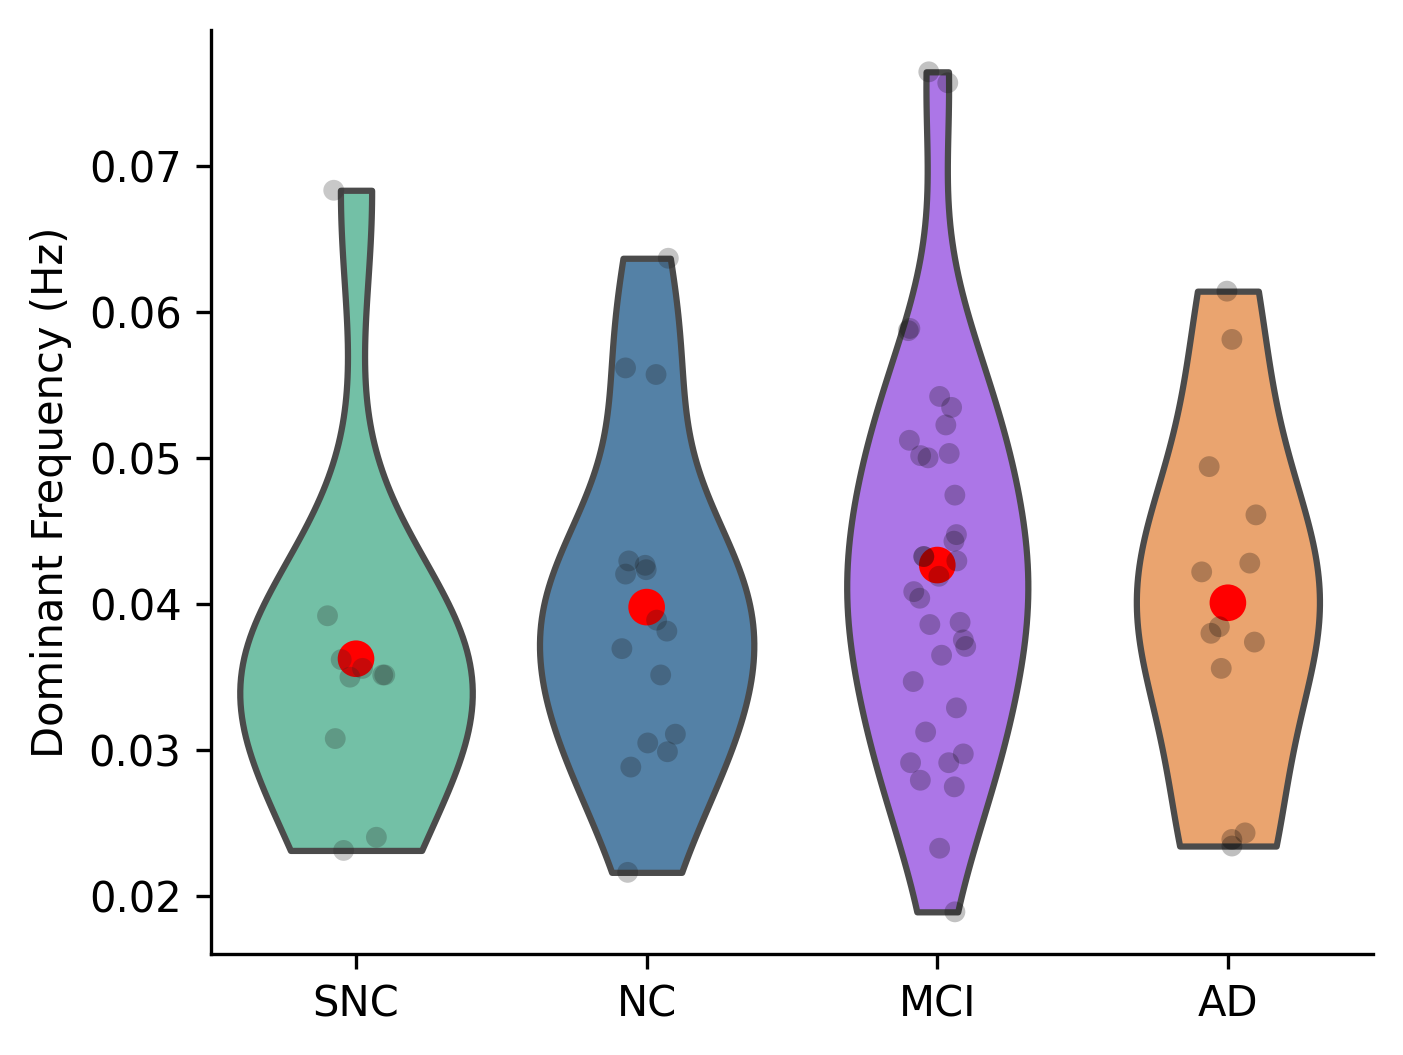

In [5]:
import seaborn as sns
# colors = ['#7F58AF','#64C5EB','#E84D8A','#FEB326']
colors = ["#66CDAA","#4682B4","#AB63FA","#FFA15A"]
figure = plt.figure(figsize=(5, 4), dpi=300)
sns.violinplot(x="groups", y="average", data=table, inner=None, cut=0, palette=colors)
sns.stripplot(x="groups", y="average",data=table, palette='dark:black', label=None, alpha=0.25)
sns.pointplot(x="groups", y="average",data=table, markers="o", color="red", errorbar=None, linestyles="None")
# plt.legend([],[], frameon=False)
# # only keep violinplot legend
# handles, labels = figure.gca().get_legend_handles_labels()
# figure.legend(handles[:2], labels[:2], loc='upper right')
# hide top and right frame
sns.despine(top=True, right=True)
plt.ylabel('Dominant Frequency (Hz)')
plt.xlabel('')

In [6]:
# import mc_homo
mc_homo = pd.read_excel("/Users/yilewang/workspaces/data4project/lateralization/gc1sec_res/meta/mc_homo.xlsx")
mc_homo['avg'] = mc_homo.iloc[:, 2:].mean(axis=1)
print(mc_homo)

   group rest_region      aCNG      mCNG      pCNG       HIP       PHG  \
0    SNC   regions_0  0.674207  0.766453  0.781690  0.733829  0.740872   
1    SNC   regions_1  0.655363  0.749922  0.766182  0.744794  0.703276   
2    SNC   regions_2  0.679110  0.729258  0.760086  0.723870  0.732353   
3    SNC   regions_3  0.667150  0.753352  0.735347  0.767919  0.751215   
4    SNC   regions_4  0.678318  0.755636  0.739213  0.733325  0.703507   
5    SNC   regions_5  0.683855  0.735145  0.726946  0.702530  0.739383   
6    SNC   regions_6  0.691703  0.761400  0.795561  0.670944  0.641954   
7    SNC   regions_7  0.722795  0.759776  0.774911  0.617675  0.701208   
8    SNC   regions_8  0.677850  0.748066  0.740625  0.577964  0.688889   
9    SNC   regions_9  0.685390  0.721829  0.743228  0.598965  0.651696   
10   SNC  regions_10  0.706670  0.736503  0.770159  0.672750  0.632218   
11   SNC  regions_11  0.709151  0.756828  0.797404  0.532661  0.619111   
12   SNC  regions_12  0.691064  0.7743

In [7]:
import statannot

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

MCI v.s. AD: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.175e-04 U_stat=1.880e+02
NC v.s. AD: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.776e-05 U_stat=1.950e+02


/var/folders/3n/xjq3mj2x4fg20l17q5mydc1c0000gn/T/ipykernel_62776/2370311128.py:4: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x="group", y = "avg", data=mc_homo, palette='dark:black', label=None, alpha=0.25)


SNC v.s. AD: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.240e-05 U_stat=1.960e+02


(0.5265924500470972, 0.8049416387266798)

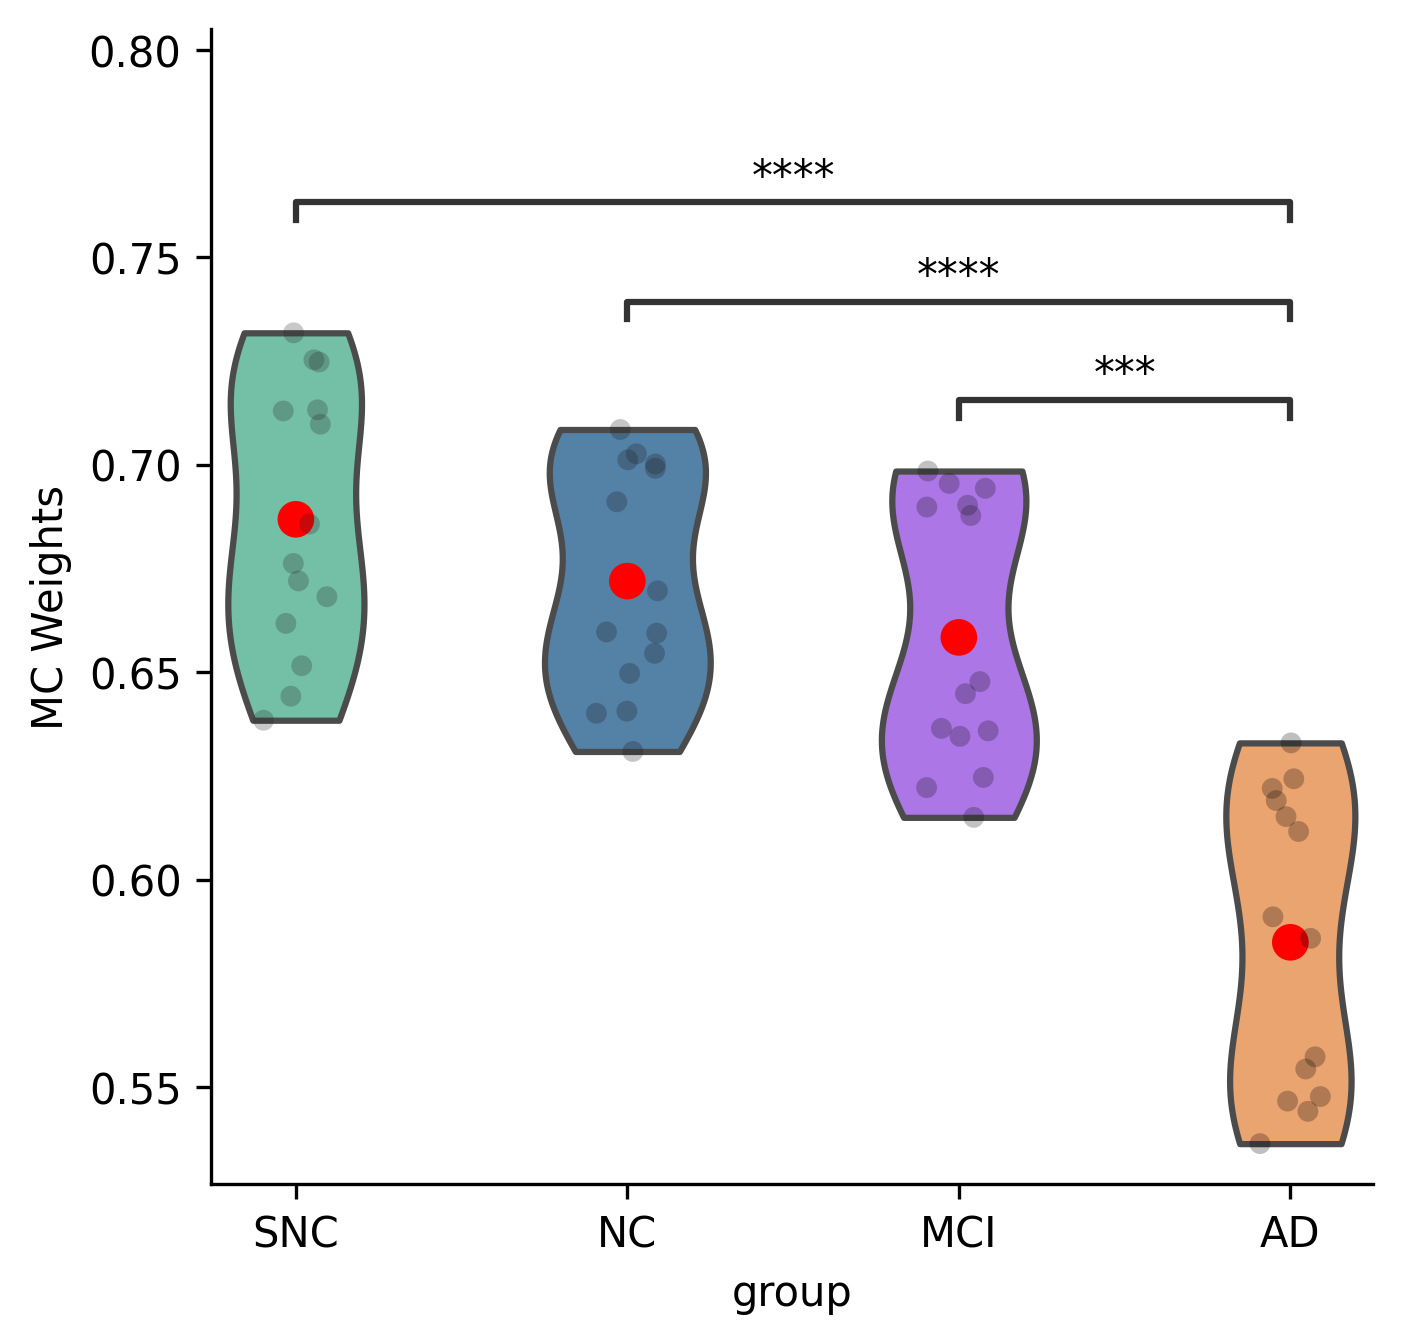

In [8]:
colors = ["#66CDAA","#4682B4","#AB63FA","#FFA15A"]
figure = plt.figure(figsize=(5,5), dpi=300)
sns.violinplot(x="group", y = "avg", data=mc_homo, inner=None, palette=colors, cut=0, width=0.5)
sns.stripplot(x="group", y = "avg", data=mc_homo, palette='dark:black', label=None, alpha=0.25)
sns.pointplot(x="group", y = "avg", data=mc_homo, markers="o", color="red", errorbar=None, linestyles="None")
statannot.add_stat_annotation(
    ax=figure.gca(),
    x="group",
    y="avg",
    data=mc_homo,
    box_pairs=[
        (("SNC", "AD")), (("NC", "AD")), (("MCI", "AD"))],
    test='Mann-Whitney',
    text_format="star")
plt.ylabel("MC Weights")
sns.despine(top=True, right=True)
plt.ylim(top=max(mc_homo.avg)*1.1)  # Increase the max y limit by 10%


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

SNC v.s. AD: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.426e-02 U_stat=1.270e+02


/var/folders/3n/xjq3mj2x4fg20l17q5mydc1c0000gn/T/ipykernel_62776/4045504329.py:5: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x="group", y = y, data=sc_homo, palette='dark:black', label=None, alpha=0.25)


(0.6468630625, 31.372686125)

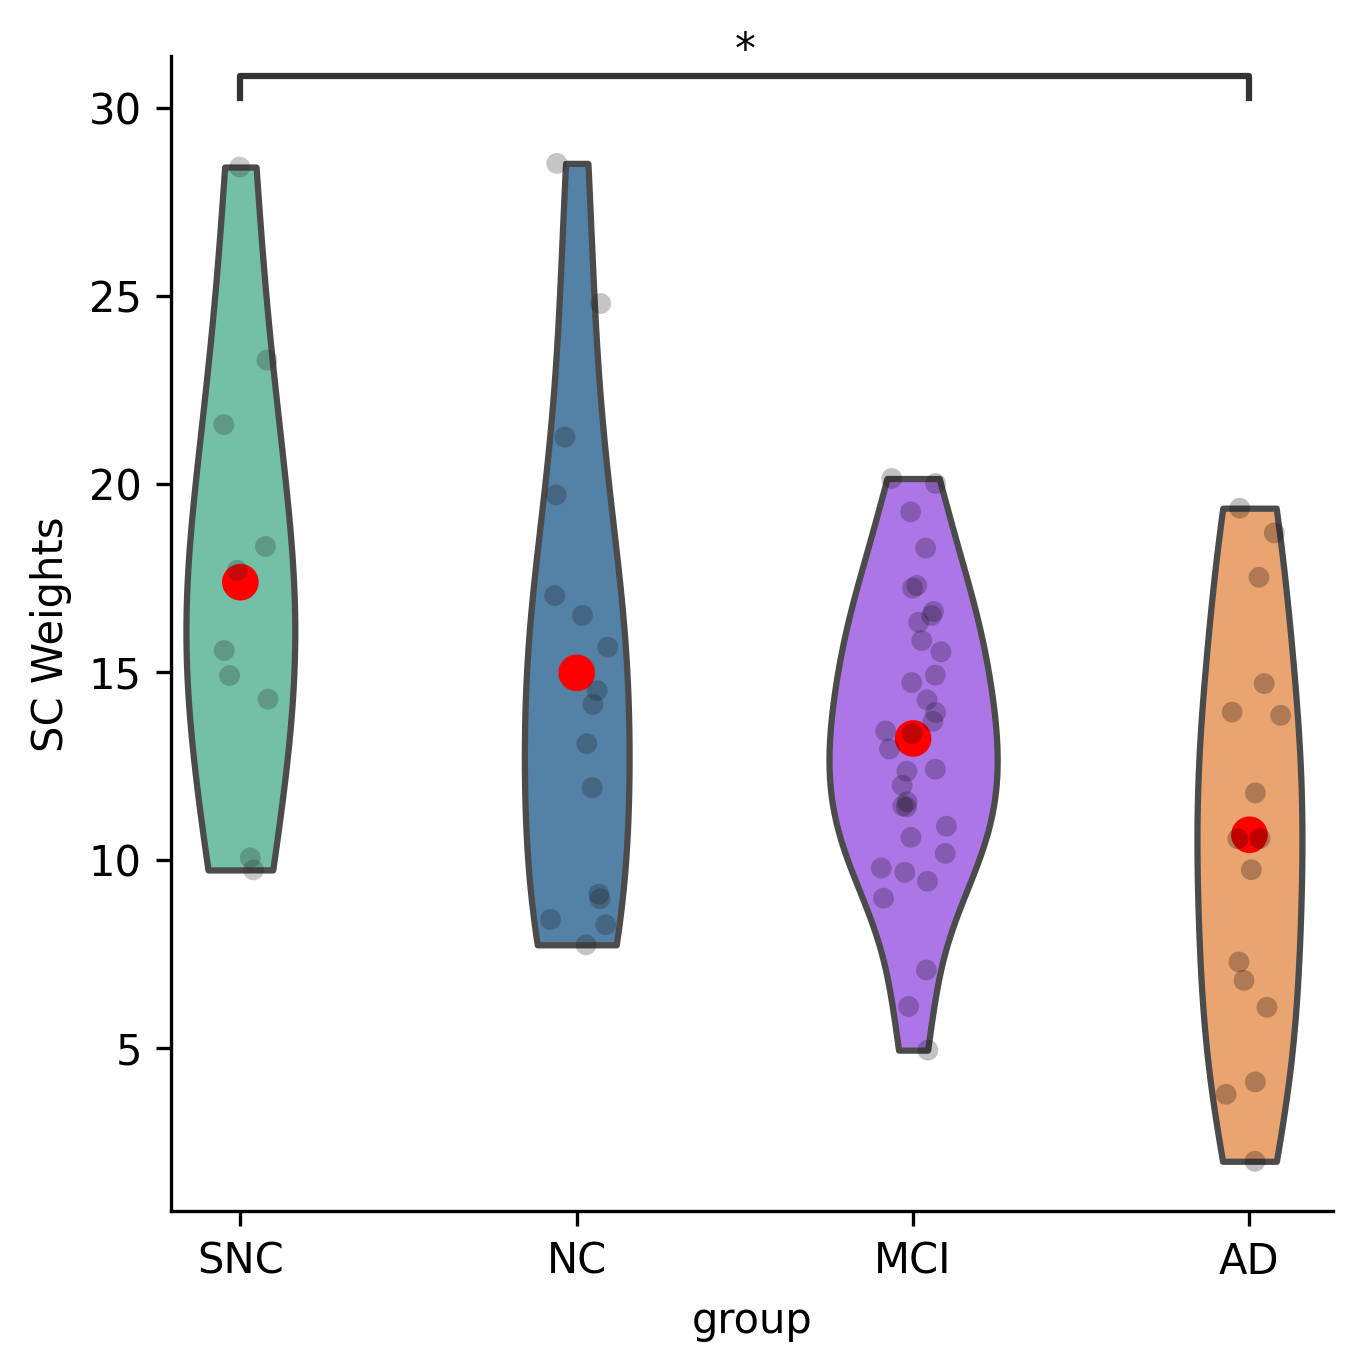

In [9]:
sc_homo = pd.read_excel("/Users/yilewang/workspaces/data4project/lateralization/gc1sec_res/sc_data.xlsx")
y = "average_homotopic_weighted"
figure = plt.figure(figsize=(5,5), dpi=300)
sns.violinplot(x="group", y = y, data=sc_homo, inner=None, palette=colors, cut=0, width=0.5)
sns.stripplot(x="group", y = y, data=sc_homo, palette='dark:black', label=None, alpha=0.25)
sns.pointplot(x="group", y =y, data=sc_homo, markers="o", color="red", errorbar=None, linestyles="None")
statannot.add_stat_annotation(
    ax=figure.gca(),
    x="group",
    y=y,
    data=sc_homo,
    box_pairs=[
        (("SNC", "AD"))],
    test='Mann-Whitney',
    text_format="star")
plt.ylabel("SC Weights")
sns.despine(top=True, right=True)
plt.ylim(top=max(sc_homo[y])*1.1)  # Increase the max y limit by 10%
